# Oficina Aula 2.1
Olá, amante da sétima arte! Durante a aula você aprendeu a representar quantidades relacionadas a dados categóricos utilizando gráficos de barras através das bibliotecas pandas, matplotlib e seaborn. Com esse conhecimento você poderá explorar e obter muitas informações sobre conjuntos de dados que possuam dados categóricos. Agora é hora de exercitar o que você aprendeu! Nesta oficina você deve continuar o conjunto de dados sobre filmes lançados entre 2007 e 2011. Crie um Jupyter Notebook e responda cada questão com código em uma célula.

1.   Importe as bibliotecas pandas, matplotlib, seaborn e use o comando mágico %matplotlib inline para exibir as visualizações no notebook. Carregue os dados em um DataFrame. Os dados estão disponibilizados no link:
dados. Você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente.
1.   Crie uma visualização que mostre o orçamento de todos os filmes do conjunto de dados. Qual o filme com maior orçamento e com menor orçamento?
1.   Crie uma visualização que mostre a bilheteria de todos os filmes do conjunto de dados. Qual o filme com maior bilheteria e com menor bilheteria?
1.   Crie uma visualização que mostre a quantidade de filmes por gênero em cada ano. Em que anos foram feitos menos filmes de ação? E em que ano foram feitos menos filmes de animação?
1.   Crie uma visualização que mostre a média de orçamento de filmes por gênero em cada ano. Em que ano os filmes de ação tiveram maior média de orçamento? E em que ano os filmes de animação tiveram a maior média de orçamento?

# 1  Importe as bibliotecas pandas/ Carregue os dados em um DataFrame

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
film_json = pd.read_json('https://raw.githubusercontent.com/evelynsantos/Data-visualization/main/dadosoficina03.txt')
film_json.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


# 2 visualização com orçamento de todos os filmes do dataset

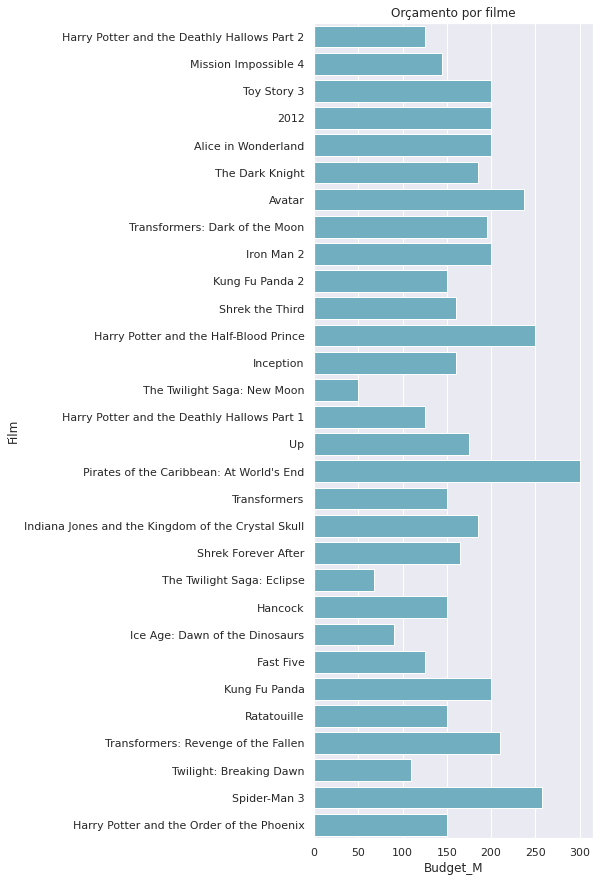

In [16]:
plt.figure(figsize=(5, 15))
sns.set(style = 'darkgrid')
plt.title('Orçamento por filme')
sns.barplot(y = 'Film', x = 'Budget_M', color = 'c', ci = None, data = film_json)
plt.show()

Exibindo filmes de maior e menor custo

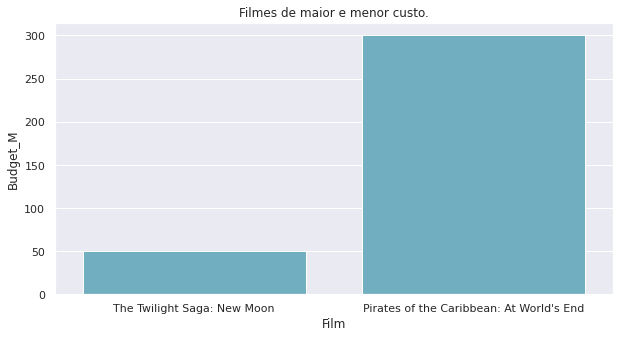

In [18]:
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
plt.title('Filmes de maior e menor custo')
higher_cost = film_json.sort_values(by='Budget_M', ascending = False).head(1)
lowest_cost = film_json.sort_values(by='Budget_M', ascending = True).head(1)
df_higher_cost = pd.concat([lowest_cost, higher_cost])
sns.barplot(x = 'Film', y = 'Budget_M', color = 'c', ci = None, data = df_higher_cost);

# 3 visualização com a bilheteria de todos os filmes do dataset

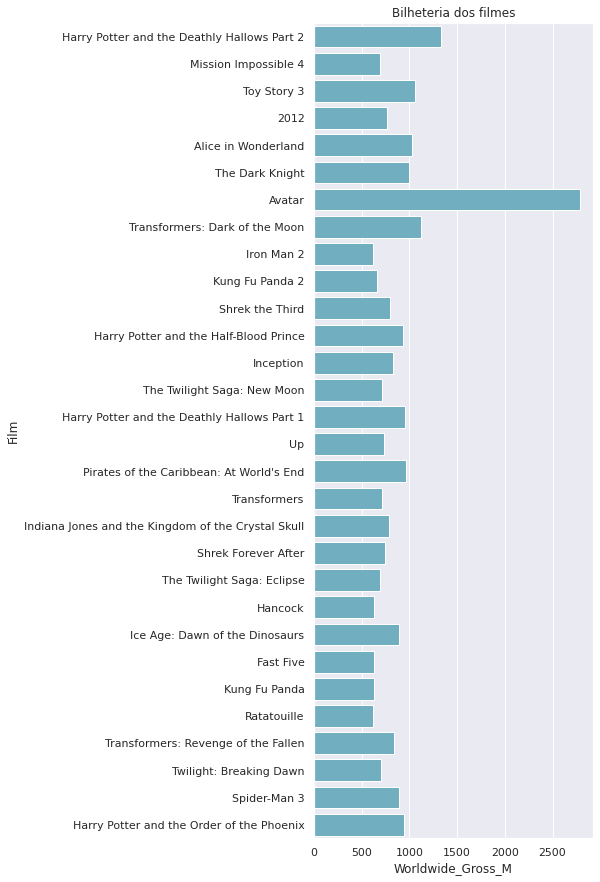

In [19]:
plt.figure(figsize=(5, 15))
sns.set(style = 'darkgrid')
plt.title('Bilheteria dos filmes')
sns.barplot(y = 'Film', x = 'Worldwide_Gross_M', color = 'c', ci = None, data = film_json)
plt.show()


filmes com maior e menor bilheteria

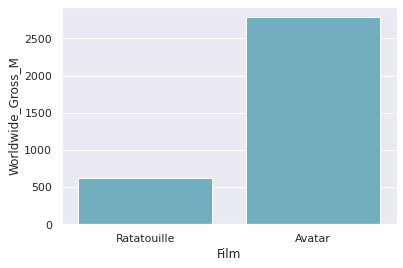

In [20]:
lowest_sale = film_json.sort_values(by='Worldwide_Gross_M', ascending = True).head(1)
biggest_sale = film_json.sort_values(by='Worldwide_Gross_M', ascending = False).head(1)
df_filmes = pd.concat([lowest_sale, biggest_sale])
sns.barplot(x = 'Film', y = 'Worldwide_Gross_M', color = 'c', estimator = sum, ci = None, data = df_filmes);

# 4 visualizaçãoda quantidade de filmes por gênero em cada ano

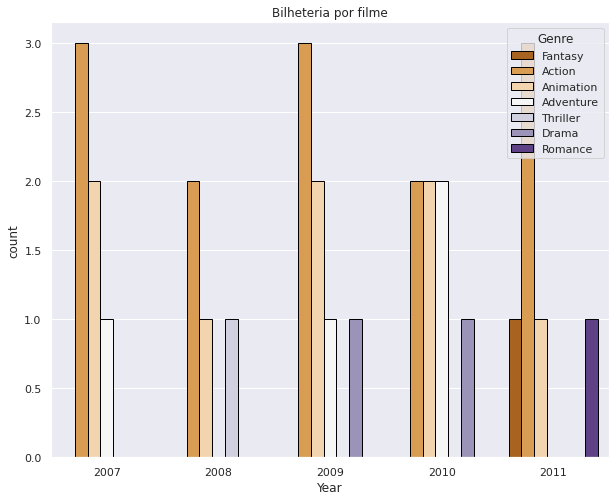

In [21]:
plt.figure(figsize=(10, 8))
sns.set(style = 'darkgrid')
plt.title('Bilheteria por filme')
#sns.countplot(x = 'Year', hue = 'Film',  data = film_json)
sns.countplot(x= 'Year', hue = 'Genre', palette = 'PuOr', edgecolor = '0', data = film_json)
plt.show()


Quantidade de filmes de ação e filmes de animação feitas por ano

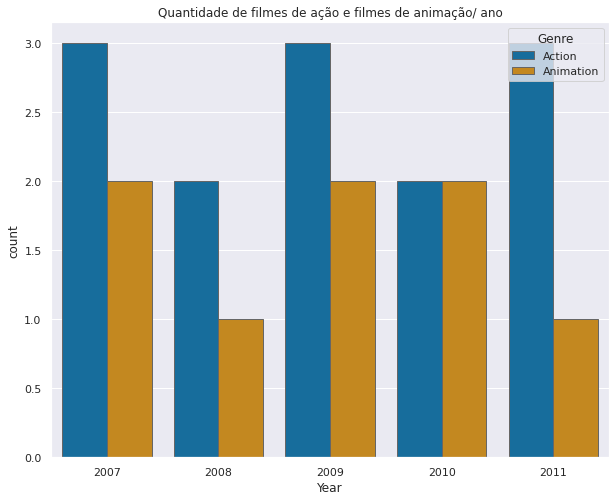

In [22]:
plt.figure(figsize=(10, 8))
sns.set(style = 'darkgrid')
plt.title('Quantidade de filmes de ação e filmes de animação/ ano')
data_action_animation = film_json.query('Genre == "Action" | Genre == "Animation"')
data_action_animation
sns.countplot(x = 'Year',hue = 'Genre', palette = 'colorblind', edgecolor = '0.4', data = data_action_animation);

# 5  visualização com a média de orçamento de filmes por gênero em cada ano

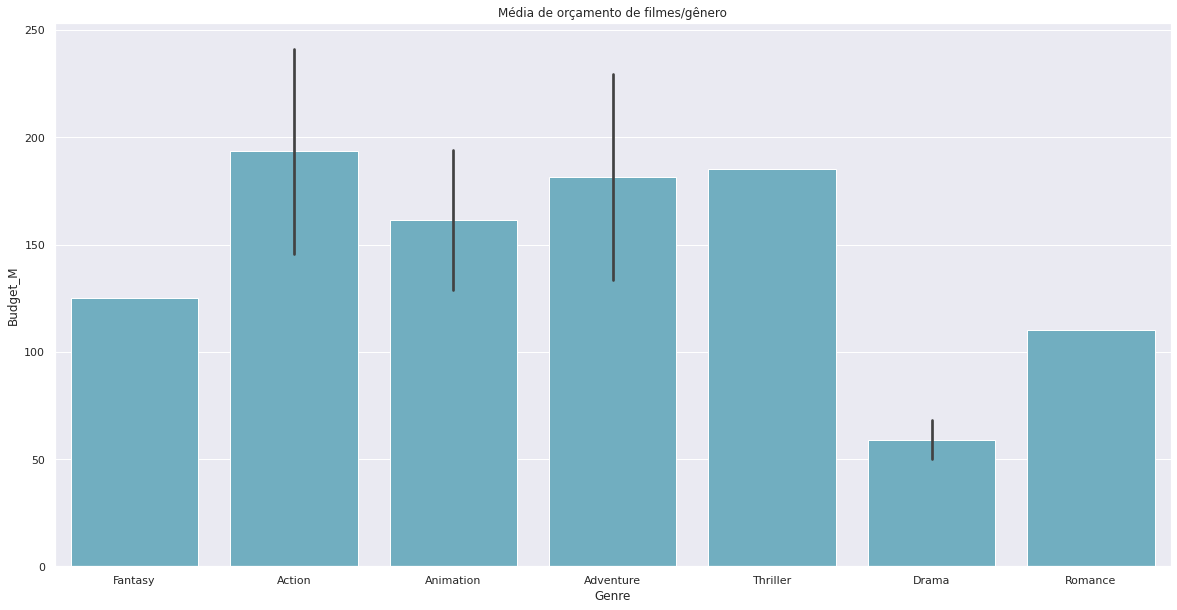

In [23]:
plt.figure(figsize=(20, 10))
sns.set(style = 'darkgrid')
plt.title('Média de orçamento de filmes/gênero')
sns.barplot(x='Genre', y='Budget_M', color='c', ci = 'sd', data=film_json)
plt.show()

Média de orçamento entre Ação e Fantasia por ano

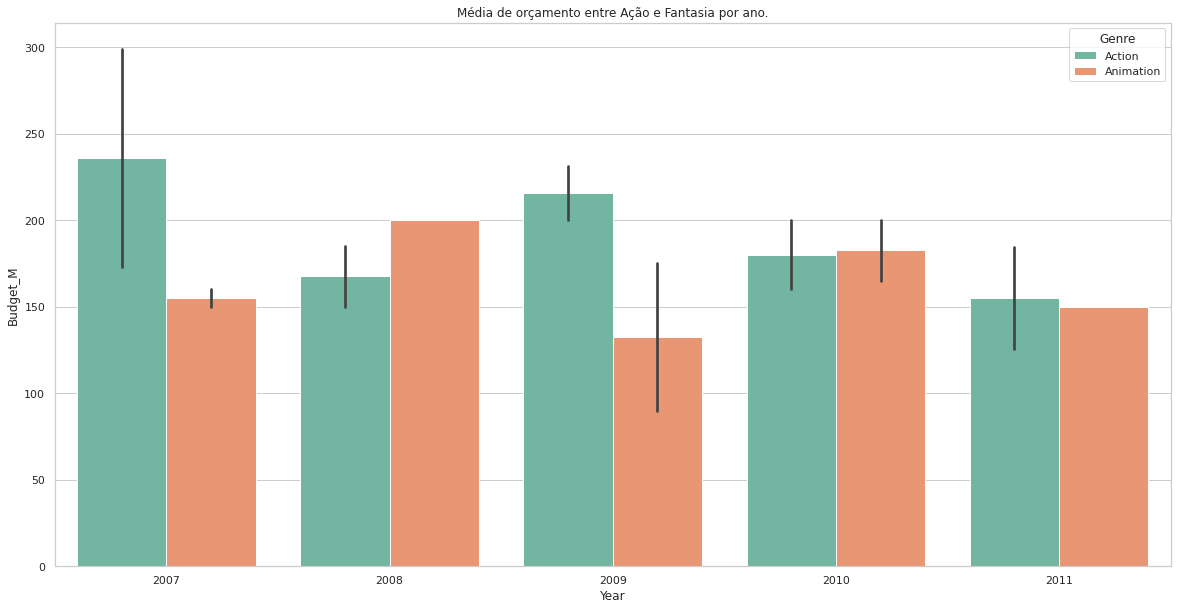

In [25]:
film_filter = film_json.query('Genre == "Action" | Genre == "Animation"')

plt.figure(figsize=(20, 10))
sns.set(style = 'whitegrid')
plt.title('Média de orçamento Ação e Fantasia / ano.')
sns.barplot(x='Year', y='Budget_M', hue = 'Genre', palette="Set2", ci = 'sd', data=film_filter)
plt.show()